In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import pathlib

from datetime import datetime, time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from ipywidgets import IntProgress
from IPython.display import display
import time


In [2]:
max_count_progress = 100

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/cyto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cyto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
BASE_DIR = pathlib.Path().cwd()

In [5]:
df = pd.read_csv('base_table.csv', parse_dates= ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime'])

    primary_call_reason  Average Handle Time  Count
0               baggage           875.741525   2832
1               booking           667.963595   2637
2               checkin           929.968487   1904
3              checkout          1741.557203   1888
4        communications          1066.687500   3840
5        digitalsupport           878.008163   1225
6            disability           795.632754    403
7                   etc          1507.184874    952
8                irrops          1145.197205  13311
9           mileageplus          1356.588617   5851
10          othertopics           588.850856    818
11           postflight          1502.327945   4330
12    products&services          1017.983193    476
13  productsandservices          1054.180672   2856
14       schedulechange           730.834473    731
15              seating          1045.819324   6365
16      travelerupdates          1083.265742    937
17   unaccompaniedminor          1207.500000    104
18          

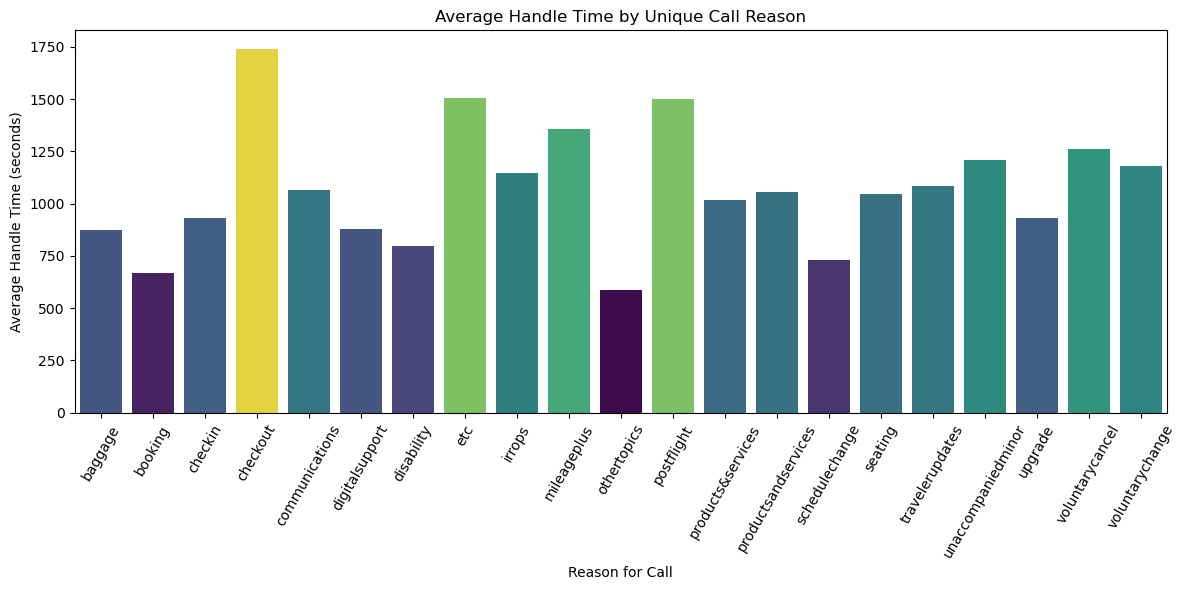

In [6]:
# normalize the reasons by stripping spaces and converting to lowercase
df['primary_call_reason'] = df['primary_call_reason'].str.replace(' ', '', regex=True).str.replace('-', '', regex=True).str.lower()
    
agg_stats = df.groupby('primary_call_reason').agg(
    Average_Handle_Time=('handle_time', 'mean'),
    Count=('handle_time', 'count')
).reset_index()
    
agg_stats.columns = ['primary_call_reason' , 'Average Handle Time', 'Count']

print(agg_stats)

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_stats, x='primary_call_reason', y='Average Handle Time', palette='viridis' , hue='Average Handle Time' , legend=False)
plt.title('Average Handle Time by Unique Call Reason')
plt.xlabel('Reason for Call')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=60)  
plt.tight_layout()  
plt.show()

In [7]:
reason_counts = df['primary_call_reason'].value_counts()

df['primary_call_reason'] = df['primary_call_reason'].str.replace(' ', '', regex=True).str.replace('-', '', regex=True).str.lower()

# find the most and least frequent reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# calculate the average handle time for each reason
aht_by_reason = df.groupby('primary_call_reason')['handle_time'].mean()

percent_difference = ((aht_by_reason[most_frequent_reason] - aht_by_reason[least_frequent_reason]) / aht_by_reason[least_frequent_reason]) * 100

print(reason_counts)
print(f"Most Frequent Reason: {most_frequent_reason}, AHT: {aht_by_reason[most_frequent_reason]:.2f}")
print(f"Least Frequent Reason: {least_frequent_reason}, AHT: {aht_by_reason[least_frequent_reason]:.2f}")
print(f"Percentage Difference in AHT: {percent_difference:.2f}%")

primary_call_reason
irrops                 13311
voluntarychange        10848
seating                 6365
mileageplus             5851
postflight              4330
communications          3840
productsandservices     2856
baggage                 2832
upgrade                 2738
booking                 2637
checkin                 1904
checkout                1888
voluntarycancel         1607
digitalsupport          1225
etc                      952
travelerupdates          937
othertopics              818
schedulechange           731
products&services        476
disability               403
unaccompaniedminor       104
Name: count, dtype: int64
Most Frequent Reason: irrops, AHT: 1145.20
Least Frequent Reason: unaccompaniedminor, AHT: 1207.50
Percentage Difference in AHT: -5.16%
